In [17]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [16]:
#create a pandas dataframe 
original_data = pd.read_table(r"\Users\Kaustav Dutta\Desktop\income_evaluation.csv", delimiter = ',', header = 0, skipinitialspace = True)
print('List of features in this file:\n', original_data.keys())#print features list
original_data = original_data.replace('?', np.NaN) #replace ? with NaN
original_data = original_data.dropna()#drop all missing data 
data = original_data.get('adult_train')
#print(df_train.describe())# information of numeric data    

List of features in this file:
 Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [19]:
'''
for column in df_train:
    if df_train.dtypes[column] == 'object':
        print(df_train[column].unique())
'''

"\nfor column in df_train:\n    if df_train.dtypes[column] == 'object':\n        print(df_train[column].unique())\n"

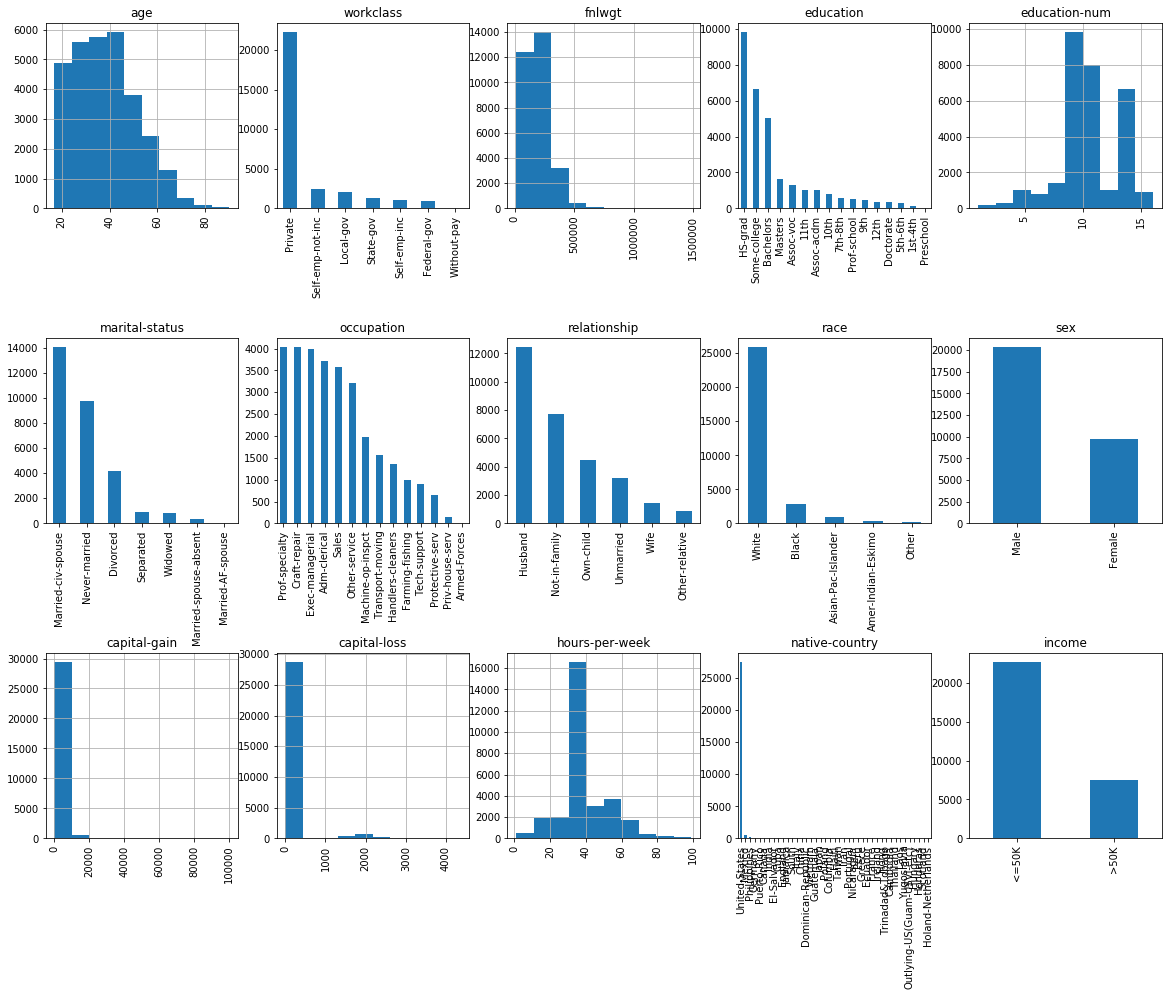

In [8]:
# Visualize feature distribution       
fig = plt.figure(figsize = (20, 15))
cols = 5
rows = math.ceil(float(original_data.shape[1]) / cols)
for i, column in enumerate(original_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if original_data.dtypes[column] == np.object:
        original_data[column].value_counts().plot(kind = "bar", axes = ax)
    else:
        original_data[column].hist(axes = ax)
        plt.xticks(rotation = "vertical")
plt.subplots_adjust(hspace = 0.7, wspace = 0.2)
fig.savefig("Feature_Histogram.png")
plt.show()

In [20]:
#create a pandas dataframe 
df_train = pd.read_table(r"\Users\Kaustav Dutta\Desktop\income_evaluation.csv", delimiter = ',', header = 0, skipinitialspace = True)
print('List of features in this file:\n', df_train.keys())#print features list
df_train = df_train.replace('?', np.NaN) #replace ? with NaN
df_train = df_train.dropna()#drop all missing data 
data = df_train.get('adult_train')
#print(df_train.describe())# information of numeric data

List of features in this file:
 Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [21]:
df_train = df_train.replace(to_replace = {'Local-gov', 'Federal-gov', 'State-gov'}, value = 'Govern-employ', regex = True)
df_train = df_train.replace(to_replace = {'Self-emp-inc', 'Self-emp-not-inc'}, value = 'Self-employ', regex = True)
df_train = df_train.replace(to_replace = {'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th'}, value = 'Primary-School', regex = True)
df_train = df_train.replace(to_replace = {'Doctorate', 'Assoc-voc' ,'Assoc-acdm', 'Prof-school'}, value = 'other', regex = True)
df_train = df_train.replace(to_replace = {'Never-married', 'Separated', 'Widowed', 'Divorced', 'Married-spouse-absent'}, value = 'no-spouse', regex = True)
df_train = df_train.replace(to_replace = {'Married-AF-spouse', 'Married-civ-spouse'}, value = 'have-spouse', regex = True)
df_train = df_train.replace(to_replace = {'United-States', 'Outlying-US(Guam-USVI-etc)', 'Canada', 'Mexico', 'Cuba','Puerto-Rico', 'Nicaragua', 
                                          'Honduras', 'Jamaica', 'Guatemala','El-Salvador', 'Haiti', 'Dominican-Republic'}, value = 'North-America', regex = True)
df_train = df_train.replace(to_replace = {'Columbia', 'Ecuador', 'Peru', 'Trinadad&Tobago'}, value = 'South-America', regex = True)
df_train = df_train.replace(to_replace = {'China', 'India', 'Vietnam', 'Taiwan', 'Laos', 'Japan', 'Thailand', 'Cambodia', 'South',
                                          'Philippines', 'Iran', 'Hong'}, value = 'Asia', regex = True)
df_train = df_train.replace(to_replace = {'England','Scotland','Ireland','Germany', 'France', 'Greece', 'Italy', 'Portugal', 'Hungary', 
                                          'Yugoslavia', 'Poland', 'Holand-Netherlands','Portugal'}, value = 'Europe', regex = True)
df_train = df_train.replace(to_replace = {'Amer-Indian-Eskimo', 'Amer-Asian-Eskimo'}, value = 'Other', regex = True) 
df_train = df_train.replace(to_replace = {'Other-service', 'Protective-serv', 'Priv-house-serv' }, value = 'Service', regex = True)
df_train = df_train.replace(to_replace = {'Machine-op-inspct', 'Tech-support', 'Armed-Forces'}, value = 'Tech', regex = True)
df_train = df_train.replace(to_replace = {'Craft-repair', 'Handlers-cleaners', 'Farming-fishing', 'Transport-moving' }, value = 'Physic-work', regex = True)
df_train = df_train.replace(to_replace = {'Adm-clerical', 'Exec-managerial', 'Sales'}, value = 'Bussiness', regex = True)

In [ ]:
#print(df_train['native-country'])
# convert categorical variable to one hot code
def convert_category(df_train, category_list):
    for name in category_list:
        dummies = pd.get_dummies(df_train[name])
        df_train = pd.concat([df_train, dummies], axis = 1)
        df_train.drop(name, inplace = True, axis = 1)
    return df_train

df_train = convert_category(df_train, ['workclass', 'education', 'marital-status', 'occupation',  
                                       'relationship', 'race', 'sex', 'native-country'])
train_label = df_train['salary']
train_label = train_label.replace('>50K', 1)
train_label = train_label.replace('<=50K', 0)
df_train.drop('fnlwgt', inplace = True, axis = 1)
df_train.drop('salary', inplace = True, axis = 1)
df_train.drop('Outlying-US(Guam-USVI-etc)', inplace = True, axis = 1)
n_train =len(df_train.index)
print(df_train.keys())
print(df_train.shape)
print(n_train)

In [26]:
#create a pandas dataframe 
df_test = pd.read_table(r"\Users\Kaustav Dutta\Desktop\income_evaluation.csv",delimiter = ',', header = 0, skipinitialspace = True)
print('List of features in this file:\n', df_test.keys())#print features list
df_test = df_test.replace('?', np.NaN) #replace ? with NaN
df_test = df_test.dropna()#drop all missing data 
data = df_test.get('adult_train')
#print(df_train.describe())# information of numeric data

List of features in this file:
 Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [27]:
df_test = df_test.replace(to_replace = {'Local-gov', 'Federal-gov', 'State-gov'}, value = 'Govern-employ', regex = True)
df_test = df_test.replace(to_replace = {'Self-emp-inc', 'Self-emp-not-inc'}, value = 'Self-employ', regex = True)
df_test = df_test.replace(to_replace = {'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th'}, value = 'Primary-School', regex = True)
df_test = df_test.replace(to_replace = {'Doctorate', 'Assoc-voc' ,'Assoc-acdm', 'Prof-school'}, value = 'other', regex = True)
df_test = df_test.replace(to_replace = {'Married-AF-spouse', 'Married-civ-spouse'}, value = 'have-spouse', regex = True)
df_test = df_test.replace(to_replace = {'Never-married', 'Separated', 'Widowed', 'Divorced', 'Married-spouse-absent'}, value = 'no-spouse', regex = True)
df_test = df_test.replace(to_replace = {'United-States','Outlying-US(Guam-USVI-etc)', 'Canada', 'Mexico', 'Cuba','Puerto-Rico', 'Nicaragua', 
                                          'Honduras', 'Jamaica', 'Guatemala','El-Salvador', 'Haiti', 'Dominican-Republic'}, value = 'North-America', regex = True)
df_test = df_test.replace(to_replace = {'Columbia', 'Ecuador', 'Peru', 'Trinadad&Tobago'}, value = 'South-America', regex = True)
df_test = df_test.replace(to_replace = {'China', 'India', 'Vietnam', 'Taiwan', 'Laos', 'Japan', 'Thailand', 'Cambodia', 'South',
                                          'Philippines', 'Iran', 'Hong'}, value = 'Asia', regex = True)
df_test = df_test.replace(to_replace = {'England','Scotland','Ireland','Germany', 'France', 'Greece', 'Italy', 'Portugal', 'Hungary', 
                                          'Yugoslavia', 'Poland', 'Holand-Netherlands','Portugal'}, value = 'Europe', regex = True)
df_test = df_test.replace(to_replace = {'Amer-Indian-Eskimo', 'Amer-Asian-Eskimo'}, value = 'Other', regex = True) 
df_test = df_test.replace(to_replace = {'Other-service', 'Protective-serv', 'Priv-house-serv' }, value = 'Service', regex = True)
df_test = df_test.replace(to_replace = {'Machine-op-inspct', 'Tech-support', 'Armed-Forces'}, value = 'Tech', regex = True)
df_test = df_test.replace(to_replace = {'Craft-repair', 'Handlers-cleaners', 'Farming-fishing', 'Transport-moving' }, value = 'Physic-work', regex = True)
df_test = df_test.replace(to_replace = {'Adm-clerical', 'Exec-managerial', 'Sales'}, value = 'Bussiness', regex = True)


In [ ]:
df_test = convert_category(df_test, ['workclass', 'education', 'marital-status', 'occupation',  
                                      'relationship', 'race', 'sex', 'native-country'])
test_label = df_test['salary']
test_label = test_label.replace('>50K.', 1)
test_label = test_label.replace('<=50K.', 0)
df_test.drop('fnlwgt', inplace = True, axis = 1)
df_test.drop('salary', inplace = True, axis = 1)
df_test.drop('Outlying-US(Guam-USVI-etc)', inplace = True, axis = 1)
print(df_test.keys())
print(df_test.shape)
#print(test_label)
n_test =len(df_test.index)
print(n_test)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
# fit an Extra Tree model to the data
extree = ExtraTreesClassifier()
extree.fit(df_train, train_label)

In [ ]:
# display the relative importance of each attribute
relval = extree.feature_importances_
# horizontal bar plot of feature importance
pos = np.arange(38) + 2
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, ('age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Govern-employ', 'Private', 'Self-employ',
       'Without-pay', 'Bachelors', 'HS-grad', 'Masters', 'Primary-School',
       'Some-college', 'other', 'have-spouse', 'no-spouse', 'Bussiness',
       'Physic-work', 'Prof-specialty', 'Service', 'Tech', 'Husband',
       'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried',
       'Wife', 'Asian-Pac-Islander', 'Black', 'Other', 'White', 'Female',
       'Male', 'Asia', 'Asia-America', 'Europe', 'North-America'))
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('feature_importance.png', dpi = 200, bbox_inches='tight')
plt.show()

In [44]:
#  plot_classification_report(classification_report) function according to f1 score
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: http://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    from itertools import izip
    pc.update_scalarmappable()
    ax = pc.axes
    for p, color, value in izip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


In [45]:
def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: http://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [50]:
def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - http://stackoverflow.com/a/16124677/395857 
    - http://stackoverflow.com/a/25074150/395857
    '''

In [ ]:
fig,ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

In [ ]:
 # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

In [ ]:
# Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))

In [ ]:
def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on http://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)
    

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg = logreg.fit(df_train, train_label)
pred_train_label = logreg.predict(df_train)
pred_test_label = logreg.predict(df_test)
#scores = cross_val_score(logreg, df_train, train_label, cv = 3)
#print('SVM Cross Validation Score is:', scores)
print('Logistic Regression Train Accuracy is:', accuracy_score(train_label, pred_train_label))
print('Logistic Regression Test Accuracy is:', accuracy_score(test_label, pred_test_label))
print('Logistic Regression Train f1 score is:', f1_score(train_label, pred_train_label))
print('Logistic Regression Test f1 score is:',f1_score(test_label, pred_test_label))
report = classification_report(test_label, pred_test_label, target_names = ['<=50K','>50K'])
plot_classification_report(report)
fig = plt.gcf()
fig.savefig('logistic_regression_f1_score.png', dpi=200, format='png', bbox_inches='tight')
plt.show()

In [ ]:
#Support Vector Machine
from sklearn import svm
clf = svm.SVC()
clf.fit(df_train, train_label)
pred_train_label = clf.predict(df_train)
pred_test_label = clf.predict(df_test)
#scores = cross_val_score(clf, df_train, train_label, cv = 3)
#print('SVM Cross Validation Score is:', scores)
print('SVM Train Accuracy is:', accuracy_score(train_label, pred_train_label))
print('SVM Test Accuracy is:', accuracy_score(test_label, pred_test_label))
print('SVM Train f1 score is:', f1_score(train_label, pred_train_label))
print('SVM Test f1 score is:', f1_score(test_label, pred_test_label))
report = classification_report(test_label, pred_test_label, target_names = ['<=50K','>50K'])
plot_classification_report(report)
fig = plt.gcf()
fig.savefig('support_vector_f1_score.png', dpi=200, format='png', bbox_inches='tight')
plt.show()

In [ ]:
#Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df_train, train_label)
pred_train_label = clf.predict(df_train)
pred_test_label = clf.predict(df_test)
#scores = cross_val_score(clf, df_train, train_label, cv = 3)
#print('Decision Tree Cross Validation SCore is:', scores)
print('Decision Tree Train Accuracy is:', accuracy_score(train_label, pred_train_label))
print('Decision Tree Test Accuracy is:', accuracy_score(test_label, pred_test_label))
print('Decision Tree Train f1 score is:', f1_score(train_label, pred_train_label))
print('Decision Tree Test f1 score is:', f1_score(test_label, pred_test_label))
report = classification_report(test_label, pred_test_label, target_names = ['<=50K','>50K'])
plot_classification_report(report)
fig = plt.gcf()
fig.savefig('decision_tree_f1_score.png', dpi=200, format='png', bbox_inches='tight')
plt.show()

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
import pydotplus 
clf = RandomForestClassifier(n_estimators = 10)
clf = clf.fit(df_train, train_label)
pred_train_label = clf.predict(df_train)
pred_test_label = clf.predict(df_test)
#scores = cross_val_score(clf, df_train, train_label, cv = 3)
#print('Random Forest Cross Validation SCore is:', scores)
print('Random Forest Train Accuracy is:', accuracy_score(train_label, pred_train_label))
print('Random Forest Test Accuracy is:', accuracy_score(test_label, pred_test_label))
print('Random Forest Train f1 score is:', f1_score(train_label, pred_train_label))
print('Random Forest Test f1 score is:', f1_score(test_label, pred_test_label))
report = classification_report(test_label, pred_test_label, target_names = ['<=50K','>50K'])
plot_classification_report(report)
fig = plt.gcf()
fig.savefig('random_forest_f1_score.png', dpi=200, format='png', bbox_inches='tight')
plt.show()

In [ ]:
# Neural Network
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver = 'lbfgs', alpha = 1e-5 , 
                    hidden_layer_sizes = (7,5), random_state = 1)
clf = clf.fit(df_train, train_label)
pred_train_label = clf.predict(df_train)
pred_test_label = clf.predict(df_test)
#scores = cross_val_score(clf, df_train, train_label, cv = 3)
#print('Multi Layer Perceptron Cross Validation SCore is:', scores)
print('Multi Layer Perceptron Train Accuracy is:', accuracy_score(train_label, pred_train_label))
print('Multi Layer Perceptron Test Accuracy is:', accuracy_score(test_label, pred_test_label))
print('Multi Layer Perceptron Train f1 score is:', f1_score(train_label, pred_train_label))
print('Multi Layer Perceptron Test f1 score is:', f1_score(test_label, pred_test_label))
report = classification_report(test_label, pred_test_label, target_names = ['<=50K','>50K'])
plot_classification_report(report)
fig = plt.gcf()
fig.savefig('neural_network_f1_score.png', dpi=200, format='png', bbox_inches='tight')
plt.show()